## 手动实现高斯滤波核
gaussian_kernel(size, sigma)创建了高斯分布权重矩阵，滤波核大小和高斯方差可以随意改变在sizes和sigmas，分别使用热图和三维图可视化手动和opencv库的滤波核

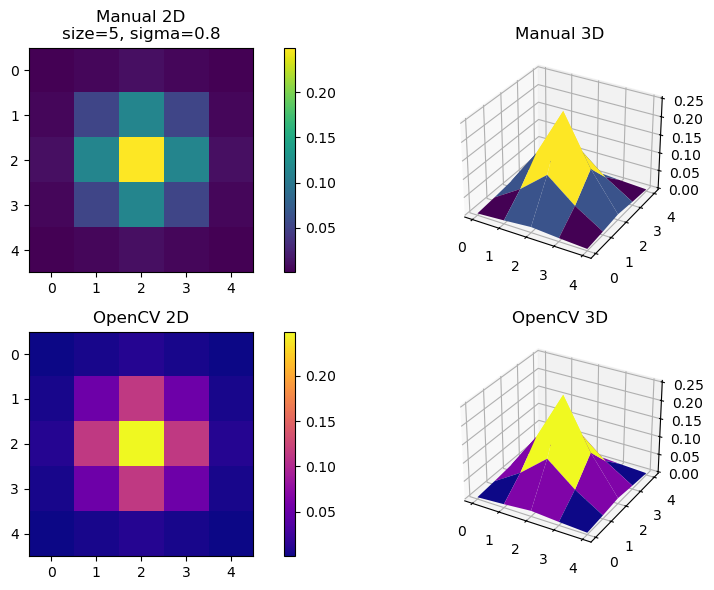

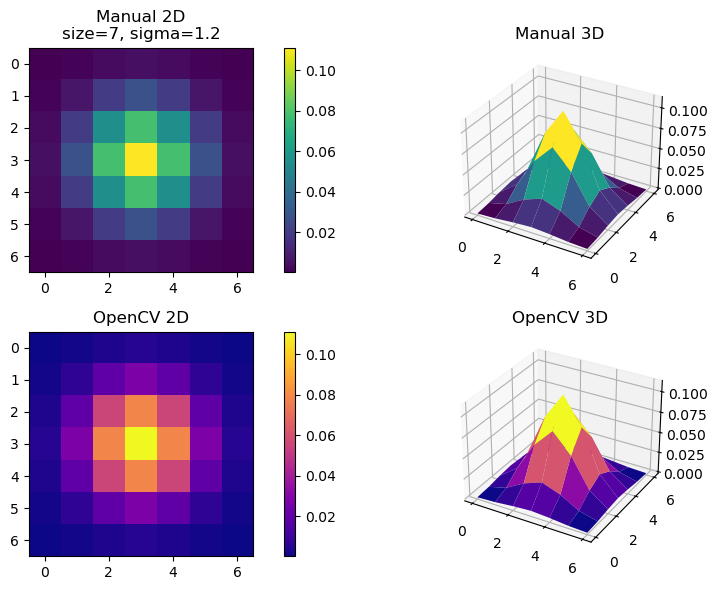

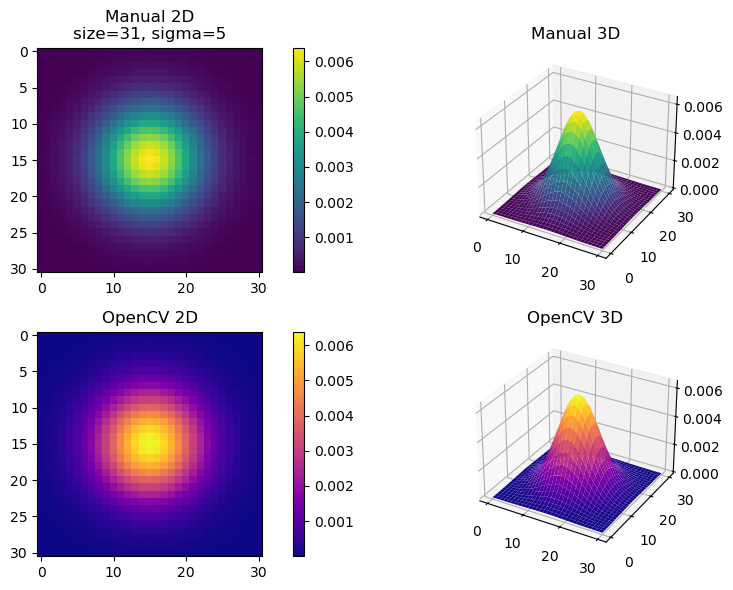

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def gaussian_kernel(size, sigma):
    k = size // 2
    x, y = np.mgrid[-k:k+1, -k:k+1]
    g = np.exp(-(x**2 + y**2) / (2 * sigma * sigma))
    g = g / g.sum()
    return g

sizes = [5, 7, 31]
sigmas = [0.8, 1.2, 5]

for s, v in zip(sizes, sigmas):
    k1 = gaussian_kernel(s, v)
    k2 = cv2.getGaussianKernel(s, v) @ cv2.getGaussianKernel(s, v).T

    fig = plt.figure(figsize=(12, 6))
    
    plt.subplot(221)
    plt.imshow(k1, cmap='viridis')
    plt.title(f'Manual 2D\nsize={s}, sigma={v}')
    plt.colorbar(fraction=0.046)

    ax1 = fig.add_subplot(222, projection='3d')
    X = np.arange(s)
    Y = np.arange(s)
    X, Y = np.meshgrid(X, Y)
    ax1.plot_surface(X, Y, k1, rstride=1, cstride=1, cmap='viridis')
    ax1.set_title('Manual 3D')
    
    plt.subplot(223)
    plt.imshow(k2, cmap='plasma')
    plt.title('OpenCV 2D')
    plt.colorbar(fraction=0.046)

    ax2 = fig.add_subplot(224, projection='3d')
    ax2.plot_surface(X, Y, k2, rstride=1, cstride=1, cmap='plasma')
    ax2.set_title('OpenCV 3D')
    
    plt.tight_layout()
    plt.show()
